## Credit Card Fraud Detection
Tools: Python, Numpy, Pandas, Matplotlib, Seaborn,  Scikit-Learn

In this dataset, spanning just two days, 492 cases of fraud are hidden among 284,807 legitimate transactions. It's a challenging puzzle. This dataset provides only numerical information, a result of a secretive PCA transformation. The original details remain concealed, but features V1 through V28, products of PCA, and the Time and Amount features remain.


### Importing and Exploring Data

In [2]:
import pandas as pd

#Read in dataset
df = pd.read_csv("./creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Checking null value
sumofnull = df.isnull().sum()
sumofnull

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Data Types
dtype = df.dtypes
dtype

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# Summary of the data
describe = df.describe()
describe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Count of Target value
target_counts = df.Class.value_counts()
target_counts

0    284315
1       492
Name: Class, dtype: int64

## Correlation Matrix
Calculating the correlation matrix and creating a heatmap reveals intricate data relationships, shedding light on hidden patterns. Displaying this heatmap guides us in making informed decisions, a critical step in our analytical journey towards insights and discovery.



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
corr_data = df.corr()
corr_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


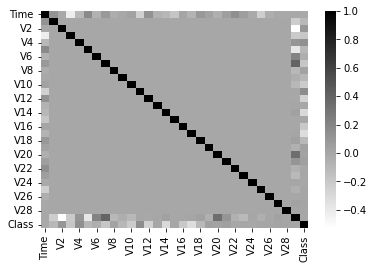

In [9]:
#Correlation Matrix Heatmap
sns.heatmap(corr_data,cmap='gist_gray_r')
plt.show()

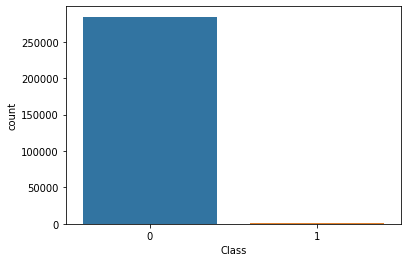

In [10]:
# Plotting count of target value for checking data imbalance
cplt = sns.countplot(data=df, x="Class")
plt.show()

## Data Preprocessing
### Feauture Scaling
We are using 'StandardScaler' and applying 'fit_transform' to standardize the 'Amount' column, ensuring data alignment, allows us to bring uniformity and scale to our dataset. By displaying the updated DataFrame, we unveil a standardized 'Amount' column, setting the stage for consistent and accurate analysis, a pivotal step in our data-driven journey toward insights.

In [11]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df['Amount'] = scalar.fit_transform(pd.DataFrame(df['Amount']))
df['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

### Task 2: Drop Unnecessary Column
In our quest for streamlined data analysis, we embark on the task of removing the 'Time' column from our DataFrame resulting updated DataFrame, ready for focused analysis, unburdened by the 'Time' column.

In [12]:
df.drop('Time',axis=1,inplace=True)
df.head()

### Deleting Duplicate Data
We are deleting duplicate values to ensure that our dataset remains free from redundant information, allowing us to maintain data integrity and precision. The result is an updated 'df' DataFrame, revealing a distilled representation of our data, devoid of duplications, and primed for rigorous analysis and insights.

In [13]:
df=df.drop_duplicates()
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [14]:
# Feature separation

X= df.drop('Class',axis=1)
y= df['Class']
__ = print(f'X:{X} \nY:{Y}')

### Oversampling technique(SMOTE)
In our quest for balanced and robust data, we import the SMOTE (Synthetic Minority Over-sampling Technique) from the 'imblearn.over_sampling' library, a pivotal step to address class imbalance. By creating a SMOTE object and employing the 'fit_resample' method on our feature matrix 'X' and target variable 'y,' we ensure that our dataset is enriched with synthetic samples, enhancing its representation of minority classes. This results in 'X_res' and 'y_res,' our resampled feature matrix and target variable, which equips us for more reliable and effective machine learning analysis, guarding against bias and improving model performance.

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)


### Splitting into Train and Test Split
In our data preparation journey, we call upon the 'train_test_split' function from 'sklearn.model_selection' to establish a robust foundation for model training and evaluation. By segmenting our data into training and testing sets, with 80% for training and 20% for testing, we create 'x_train,' 'x_test,' 'y_train,' and 'y_test.' These partitions ensure our machine learning models have a fair and independent assessment of their performance, safeguarding against overfitting and enhancing the reliability of our predictive analytics.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X_res,y_res, random_state=4, test_size=0.2)


### Logistic Regression
In our quest for predictive excellence and informed decision-making, we commence by importing the necessary tools: the 'LogisticRegression' class from 'sklearn.linear_model' and the 'cross_val_score' function from 'sklearn.model_selection.' We then craft a Logistic Regression model, a powerful and interpretable algorithm known for its effectiveness in binary classification tasks. This model works by calculating the probabilities of a binary outcome and making decisions based on a specified threshold. After meticulously fitting our Logistic Regression model to the training data, we employ 10-fold cross-validation, using 'lg_model,' 'x_train,' and 'y_train,' to rigorously evaluate its performance across multiple subsets of the data. The 'lg_mean_score,' representing the mean of these cross-validation scores rounded to four decimal places, becomes our compass in selecting a reliable model. With its interpretability and robust performance, Logistic Regression equips us with a dependable tool for making accurate predictions and gaining valuable insights from our data.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

lg_cvs = cross_val_score(lg_model, x_train, y_train, cv=10)
lg_mean_score= round(lg_cvs.mean(),4)

lg_mean_score

0.9446

### Linear Discriminant Analysis (LDA)
In our pursuit of robust predictive modeling, we start by importing the 'LinearDiscriminantAnalysis' class from 'sklearn.discriminant_analysis.' Linear Discriminant Analysis (LDA), our chosen model, is a versatile technique known for both classification and dimensionality reduction tasks. LDA operates by finding linear combinations of features that optimally separate different classes, making it ideal for discriminating between multiple classes with interpretability. After fitting 'ld_model' to our training data, we subject it to rigorous evaluation through 10-fold cross-validation, a technique that assesses its performance across diverse data subsets. The 'ld_mean_score,' a four-decimal-rounded mean of these cross-validation scores, serves as our compass, guiding us in selecting a dependable model. LDA empowers us with predictive accuracy and deep insights, making it an invaluable asset in our data-driven journey.

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ld_model = LinearDiscriminantAnalysis().fit(x_train,y_train)
ld_cvs = cross_val_score(ld_model,x_train,y_train,cv=10)
ld_mean_score= round(ld_cvs.mean(),4)

ld_mean_score

0.9157

### Gaussian Naive Bayes (GNB)
In our pursuit of versatile modeling techniques, we embark on the task of implementing the Gaussian Naive Bayes (GNB) model. To begin, we import the 'GaussianNB' class from 'sklearn.naive_bayes,' a model rooted in Bayesian probability theory. GNB is particularly well-suited for classification tasks, especially when dealing with continuous or real-valued features. After initializing 'gnb_model' and fitting it to our training data, we employ 10-fold cross-validation to rigorously evaluate its performance, ensuring robustness and reliability in classification tasks. The 'gnb_mean_score,' representing the mean of these cross-validation scores rounded to four decimal places, becomes our guiding metric, aiding us in making informed decisions about the effectiveness of the Gaussian Naive Bayes model.

Gaussian Naive Bayes (GNB): GNB is a probabilistic classification algorithm that assumes that the features within each class follow a Gaussian (normal) distribution. Despite its "naive" assumption of feature independence, it often performs surprisingly well in practice, especially when dealing with continuous or real-valued data. It calculates the probability of a data point belonging to a particular class using Bayes' theorem, making it a valuable tool for classification tasks with strong probabilistic foundations.

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(x_train,y_train)
gnb_cvs = cross_val_score(gnb_model,x_train,y_train,cv=10)

gnb_mean_score = round(gnb_cvs.mean(),4)

gnb_mean_score

0.9114

### Task 4: Evaluating Model
To ensure the utmost accuracy and clarity in assessing our model's performance, we import essential metrics from 'sklearn.metrics,' including 'accuracy_score,' 'confusion_matrix,' and 'classification_report.' Leveraging the best-trained model with a high mean score derived from our earlier meticulous evaluation, we employ it to predict the target variable for our test data, resulting in 'y_pred.' By calculating the accuracy score, constructing the confusion matrix, and generating a comprehensive classification report, we gain a holistic understanding of our model's effectiveness in making predictions and its ability to generalize to unseen data, thus empowering us with valuable insights for informed decision-making.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lg_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred) 

cm = confusion_matrix(y_test,y_pred)

cr= classification_report(y_test,y_pred)

__ = [print(f"{k}\n{v}\n") for k,v in {"Accuracy Score:":accuracy, "Confusion Matrix:":cm, "Classification Report:":cr}.items()]


Accuracy Score:
0.944538318979614

Confusion Matrix:
[[53756  1391]
 [ 4714 50215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55147
           1       0.97      0.91      0.94     54929

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076




In [23]:
# Testing the model
column_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

sample_data_dict = {
    'V1': [-0.5],'V2': [1.0],'V3': [-0.7],'V4': [-0.2],'V5': [2.4],'V6': [3.4],'V7': [-0.1],'V8': [1.3],
    'V9': [-1.0],'V10': [-0.4],'V11': [0.5],'V12': [-0.3],'V13': [0.2],'V14': [-0.6],'V15': [0.8],'V16': [-0.9],
    'V17': [1.5],'V18': [-0.3],'V19': [0.7],'V20': [0.1],'V21': [0.2],'V22': [0.1],'V23': [-0.2],
    'V24': [1.0],'V25': [-0.1],'V26': [-0.3],'V27': [0.1],'V28': [0.1],'Amount': [100.0]
}

sample_data = pd.DataFrame(sample_data_dict, columns=column_names)
prediction = lg_model.predict(sample_data)

prediction

array([1])